In [ ]:
%matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [45]:
# get sim files
simfilepath = "/Users/brandonmanley/Documents/nBody/data/brutusSim/brutus10_1_10.csv"
df = pd.read_csv(simfilepath, index_col=False)
nBodies = 10

In [46]:
# grab predicted dataframe
#############################################

cols = ["file", "eventID"]
massHead, xHead, yHead, dxHead, dyHead, xfHead,yfHead, dxfHead, dyfHead = [], [], [], [], [], [], [], [], []
for i in range(1, nBodies+1):
    massHead.append("m{0}".format(i))
    xHead.append("x{0}".format(i))
    yHead.append("y{0}".format(i))
    dxHead.append("dx{0}".format(i))
    dyHead.append("dy{0}".format(i))
    xfHead.append("xf{0}".format(i))
    yfHead.append("yf{0}".format(i))
    dxfHead.append("dxf{0}".format(i))
    dyfHead.append("dyf{0}".format(i))
cols += massHead + xHead + yHead + dxHead + dyHead + ["t"] + xfHead + yfHead + dxfHead + dyfHead
    
prediction = False # whether read nn file or nots
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"

pdf = df
if prediction:
    pdf = pd.read_csv(nnfile)

In [47]:
# combine dataframes
###############################################
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

mdf = pdf
if prediction:
    adf = pd.merge(left=sdf,right=pdf, on='eventID')
    mdf = adf.drop_duplicates(subset='eventID')

[1 2]


<IPython.core.display.Javascript object>


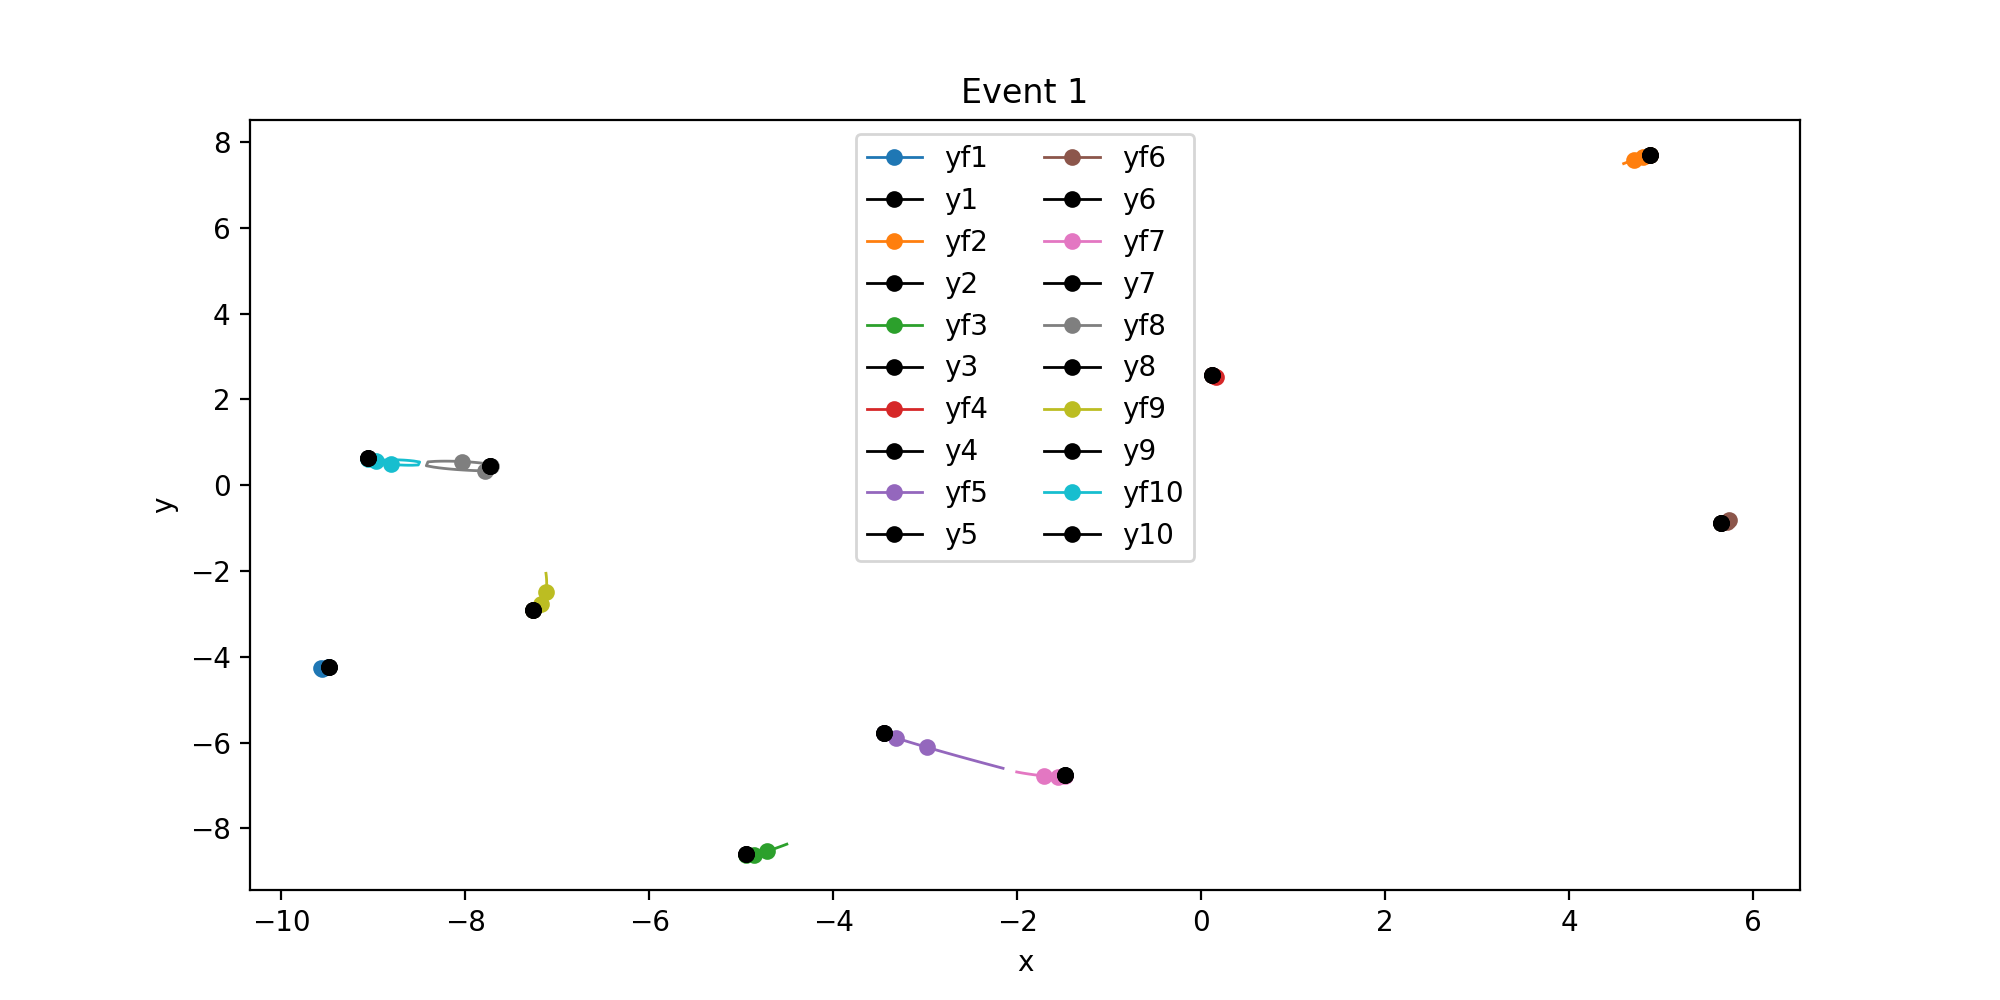

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/opt/anaconda3/lib/python3.7/site-packages/ipyke

In [51]:
# plot an individual event
###############################################

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
indexInt = np.random.choice(indexArray)
index = indexInt*10000
print(indexArray)

# plot event 
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

tsize = 5
for i in range(1, nBodies+1):
    ax.plot('xf{0}'.format(i), 'yf{0}'.format(i), data=edf, marker='o',linewidth=1, markersize=tsize, markevery=30)
    ax.plot('x{0}'.format(i), 'y{0}'.format(i), data=edf, marker='o',color='black', linewidth=1, markersize=tsize, markevery=30)

if prediction:
    ax.plot('xfp{0}'.format(i), 'yfp{0}'.format(i), data=edf, marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)

plt.legend(loc='best', ncol=2, fancybox=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Event {0}'.format(int(index/10000)))
plt.show()

In [ ]:
# define possible metrics
#####################################

# barycenter
mdf['ibaryX'] = (mdf['m1']*mdf['x1']+mdf['m2']*mdf['x2']+mdf['m3']*mdf['x3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['ibaryY'] = (mdf['m1']*mdf['y1']+mdf['m2']*mdf['y2']+mdf['m3']*mdf['y3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryX'] = (mdf['m1']*mdf['x1tEnd']+mdf['m2']*mdf['x2tEnd']+mdf['m3']*mdf['x3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryY'] = (mdf['m1']*mdf['y1tEnd']+mdf['m2']*mdf['y2tEnd']+mdf['m3']*mdf['y3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryDiffX'] = np.abs(mdf['baryX']-mdf['ibaryX'])
mdf['baryDiffY'] = np.abs(mdf['baryY']-mdf['ibaryY'])


# energy



# moment of inertia
mdf['imomentX'] = mdf['m1']*(mdf['x1']**2) + mdf['m2']*(mdf['x2']**2) + mdf['m3']*(mdf['x3']**2)
mdf['momentX'] = mdf['m1']*(mdf['x1tEnd']**2) + mdf['m2']*(mdf['x2tEnd']**2) + mdf['m3']*(mdf['x3tEnd']**2)
mdf['imomentY'] = mdf['m1']*(mdf['y1']**2) + mdf['m2']*(mdf['y2']**2) + mdf['m3']*(mdf['y3']**2)
mdf['momentY'] = mdf['m1']*(mdf['y1tEnd']**2) + mdf['m2']*(mdf['y2tEnd']**2) + mdf['m3']*(mdf['y3tEnd']**2)
mdf['momentDiffX'] = np.abs(mdf['momentX']-mdf['imomentX'])
mdf['momentDiffY'] = np.abs(mdf['momentY']-mdf['imomentY'])


# momentum/angular momentum


# plot nn vars only if loaded
if prediction:
    mdf['baryX_p'] = (mdf['m1']*mdf['x1tEnd_p']+mdf['m2']*mdf['x2tEnd_p']+mdf['m3']*mdf['x3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
    mdf['baryY_p'] = (mdf['m1']*mdf['y1tEnd_p']+mdf['m2']*mdf['y2tEnd_p']+mdf['m3']*mdf['y3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
    mdf['baryDiffX_p'] = np.abs(mdf['baryX_p']-mdf['ibaryX'])
    mdf['baryDiffY_p'] = np.abs(mdf['baryY_p']-mdf['ibaryY'])
    mdf['momentDiffX_p'] = np.abs(mdf['momentX_p']-mdf['imomentX'])
    mdf['momentDiffY_p'] = np.abs(mdf['momentY_p']-mdf['imomentY'])
    mdf['momentX_p'] = mdf['m1']*(mdf['x1tEnd_p']**2) + mdf['m2']*(mdf['x2tEnd_p']**2) + mdf['m3']*(mdf['x3tEnd_p']**2)
    mdf['momentY_p'] = mdf['m1']*(mdf['y1tEnd_p']**2) + mdf['m2']*(mdf['y2tEnd_p']**2) + mdf['m3']*(mdf['y3tEnd_p']**2)

In [ ]:
# plot metric (for all or 1 event)
####################################
singleEvent = True
metric = "bary"

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
print(index)
ddf = mdf
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
if singleEvent: ddf = edf

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

bsize = 1
lsize = 0
if singleEvent: 
    bsize = 0
    lsize = 2

if prediction:
    ax.plot('tEnd', '{0}DiffX_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
    ax.plot('tEnd', '{0}DiffY_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.plot('tEnd', '{0}DiffX'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
ax.plot('tEnd', '{0}DiffY'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.set_yscale('log')
plt.xlabel('Time')
plt.ylabel('Δ {0} Coordinate'.format(metric))
if singleEvent: plt.title("{0} for Event {1}".format(metric,int(index/10000)))
else: plt.title("{0} for All events".format(metric))
plt.legend(("Pred (X)", "Pred (Y)", "Sim (X)", "Sim (Y)"),loc='best', ncol=2, fancybox=True)
# plt.show()